# This analysis is to see the effect of cluster on the pursuit of the current target

# Import packages

In [1]:

%load_ext autoreload
%autoreload 2

from pathlib import Path
import os, sys
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break


import sys


from data_wrangling import specific_utils, process_monkey_information, base_processing_class, combine_info_utils
from pattern_discovery import pattern_by_trials, pattern_by_points, make_ff_dataframe, ff_dataframe_utils, pattern_by_trials, pattern_by_points, cluster_analysis, organize_patterns_and_features, category_class, cluster_analysis
from decision_making_analysis.decision_making import decision_making_class, decision_making_utils, plot_decision_making, intended_targets_classes
from decision_making_analysis.GUAT import GUAT_helper_class, GUAT_collect_info_class, GUAT_combine_info_class, add_features_GUAT_and_TAFT
from decision_making_analysis import free_selection, replacement, trajectory_info
from null_behaviors import show_null_trajectory, find_best_arc, curvature_utils, curv_of_traj_utils
from machine_learning.ml_methods import regression_utils, classification_utils, prep_ml_data_utils, hyperparam_tuning_class
from reinforcement_learning.base_classes import env_utils, base_env, more_envs, rl_base_class, rl_base_utils
from reinforcement_learning.agents.rnn import gru_utils, lstm_utils
from reinforcement_learning.agents.feedforward import interpret_neural_network, sb3_class, sb3_utils
from visualization.matplotlib_tools import plot_trials, plot_polar, additional_plots, plot_behaviors_utils, plot_statistics, monkey_heading_utils
from visualization.animation import animation_func, animation_utils, animation_class
from planning_analysis.test_params_for_planning import params_test_combos_class, params_utils
from visualization.plotly_tools import plotly_for_monkey, plotly_for_time_series, plotly_preparation, plotly_for_correlation
from visualization.dash_tools import dash_prep_class, dash_utils, dash_utils, dash_comparison_class, dash_params_class
from visualization.dash_tools.dash_main_class_methods import dash_main_class
from neural_data_analysis.neural_analysis_tools.get_neural_data import neural_data_processing
from neural_data_analysis.neural_analysis_tools.visualize_neural_data import plot_neural_data, plot_modeling_result
from neural_data_analysis.neural_analysis_tools.model_neural_data import transform_vars, neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from neural_data_analysis.topic_based_neural_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from neural_data_analysis.topic_based_neural_analysis.planning_and_neural import planning_and_neural_class, pn_utils
from planning_analysis.show_planning import nxt_ff_utils, show_planning_class, show_planning_utils
from planning_analysis import ml_for_planning_class, ml_for_planning_utils
from planning_analysis.show_planning.cur_vs_nxt_ff import cvn_helper_class, find_cvn_utils, plot_cvn_class, plot_cvn_utils, plot_monkey_heading_helper_class, cvn_from_ref_class
from planning_analysis.only_cur_ff import only_cur_ff_utils, only_cur_ff_class, only_cur_ff_utils, only_cur_ff_x_sess_class
from planning_analysis.plan_factors import plan_factors_utils, build_factor_comp, plan_factors_class, monkey_plan_factors_x_sess_class
from machine_learning.ml_methods import ml_methods_class, prep_ml_data_utils
from planning_analysis.plan_factors import monkey_plan_factors_x_sess_class, test_vs_control_utils, monkey_plan_factors_x_sess_class
from planning_analysis.only_cur_ff import features_to_keep_utils
from eye_position_analysis import eye_positions

from importlib import reload
import os, sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor
from matplotlib import cm
from os.path import exists
import seaborn as sns
import math
import copy
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
import itertools
import plotly.express as px
from scipy.stats import rankdata
from scipy import stats
from IPython.display import HTML
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, hamming_loss, multilabel_confusion_matrix, fbeta_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from math import pi
from scipy.ndimage import gaussian_filter1d
from statsmodels.graphics.tsaplots import plot_acf
import warnings
import os, sys, sys
from sklearn.exceptions import ConvergenceWarning
import plotly.graph_objects as go
import gc
from sklearn.cross_decomposition import CCA

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
pd.options.display.max_rows = 101

Changed the directory to 'Multifirefly-Project'.
Added /Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods to the path.


In [2]:
data_item = None
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328"

# Run before sleep

## all_only_cur_lr_df

In [3]:
osfxs =only_cur_ff_x_sess_class.OnlyStopFFAcrossSessions(monkey_name='monkey_Bruno')
all_only_cur_lr_df = osfxs.make_or_retrieve_all_only_cur_lr_df()

Failed to retrieve all_only_cur_lr_df from all_monkey_data/planning/monkey_Bruno/combined_data/only_cur_ff/ml_results/lr_variations/opt_arc_stop_closest/all_only_cur_lr_df.csv; will make a new one
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0219
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Failed to retrieve only_cur_ff_df from all_monkey_data/planning/monkey_Bruno/data_0219/only_cur_ff/only_cur_ff_df/opt_arc_stop_closest/Bruno_stop_0_2.csv; will make a new one
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0219/ff_dataframe.h5
Number of unique ff in the dropped rows: 47
New only_cur_ff_df was stored in all_monkey_data/planning/monkey_Bruno/data_0219/only_cur_ff/only_cur_ff_df/opt_arc_stop_closest/Bruno_stop_0_2.csv.
Failed to retrieve x_features_df from all_monkey_data/planning/monkey_Bruno/data_0219/only_cur_ff/x_feature

KeyboardInterrupt: 

In [11]:
gc.collect()

3933

In [ ]:
stop!

## all_only_cur_ml_df

In [ ]:
osfxs =only_cur_ff_x_sess_class.OnlyStopFFAcrossSessions(monkey_name='monkey_Bruno')
all_only_cur_ml_df = osfxs.make_or_retrieve_all_only_cur_ml_df()

# OnlyStopFF

## make df for one session

In [ ]:
gc.collect()

In [36]:
raw_data_folder_path = 'all_monkey_data/raw_monkey_data/monkey_Bruno/data_0326'
osf = only_cur_ff_class.OnlyStopFF(raw_data_folder_path=raw_data_folder_path)

Retrieved monkey data from  raw_monkey_data/monkey_Bruno/data_0326/processed_data/basic_info/monkey_information.csv  and ff data from  raw_monkey_data/monkey_Bruno/data_0326/processed_data/basic_info/ff_basic_info.npz


In [37]:
osf.make_only_cur_ff_df(exists_ok=True, ref_point_mode='distance', ref_point_value=-150)

Failed to retrieve only_cur_ff_df from raw_monkey_data/monkey_Bruno/data_0326/processed_data/planning_info/norm_opt_arc/only_cur_ff/Bruno_dist_150.csv; will make a new one
Retrieved ff_dataframe from  raw_monkey_data/monkey_Bruno/data_0326/processed_data/basic_info/ff_dataframe.h5
New only_cur_ff_df was stored in raw_monkey_data/monkey_Bruno/data_0326/processed_data/planning_info/norm_opt_arc/only_cur_ff/Bruno_dist_150.csv.


In [38]:
osf.make_x_features_df(exists_ok=True)

Failed to retrieve x_features_df from raw_monkey_data/monkey_Bruno/data_0326/processed_data/planning_info/norm_opt_arc/x_features_df/Bruno_dist_150.csv; will make a new one
Dropped NaN values in ff_info_at_start_df
New x_features_df was stored in raw_monkey_data/monkey_Bruno/data_0326/processed_data/planning_info/norm_opt_arc/x_features_df/Bruno_dist_150.csv.


In [ ]:
stop!

## Iterate through sessions

In [ ]:
ref_point_mode = 'time after cur ff visible'
ref_point_value = 0.1

osfxs =only_cur_ff_x_sess_class.OnlyStopFFAcrossSessions(monkey_name='monkey_Bruno')
osfxs.make_only_cur_ff_df_and_x_features_df_across_sessions(exists_ok=True, x_features_df_exists_ok=True, only_cur_ff_df_exists_ok=True,
                                                           ref_point_mode=ref_point_mode, ref_point_value=ref_point_value)

osfxs.prepare_only_cur_ff_data_for_ml()

## debug

In [16]:
osf.only_cur_ff_df.shape

(1021, 50)

## Linear regression: Use loop on y column

y_var_column: curv_of_traj_before_stop
Added interaction terms.
num_features_before_lasso: 299
num_features_after_lasso: 21
Number of outliers dropped before train_test_split: 5 out of 1015 samples.
R-squared:  0.344
Adjusted R-squared:  0.3273
R-squared on test set: 0.3527


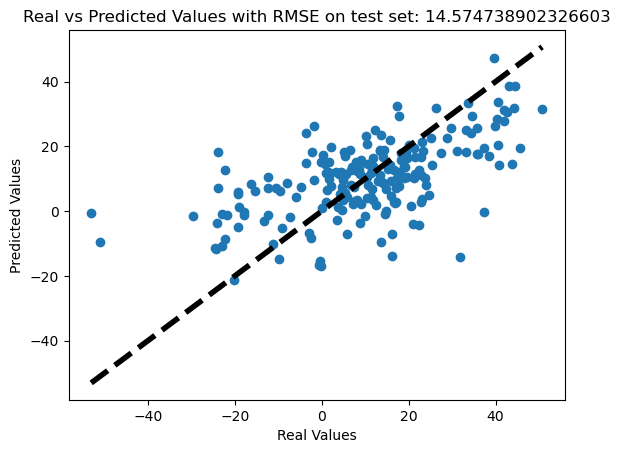

                                               index  p_value  Coefficient  \
0                                              const  0.00000     10.84145   
1  cur_ff_angle_at_ref cur_ff_earliest_flash_re...  0.00000      5.81550   
2                               cur_ff_angle_at_ref  0.00071      3.90821   
3           cur_ff_cluster_100_LEFTMOST_ff_distance  0.00046      1.97835   
4       cur_ff_cluster_100_RIGHTMOST_flash_duration  0.00641     -1.57627   
5  cur_ff_cluster_300_LATEST_FLASH_angle_diff_bo...  0.04038     -1.26479   
6           cur_ff_ang_cluster_20_num_ff_in_cluster  0.02834     -1.14574   
7  flash_cluster_1_5_to_2_0_LEFTMOST_earliest_fla...  0.03118     -1.12036   

   Std Err        t  abs_coeff  rank_by_abs_coeff  
0  0.51791 20.93300   10.84145                  1  
1  0.87099  6.67691    5.81550                  2  
2  1.15040  3.39725    3.90821                  3  
3  0.56205  3.51990    1.97835                  4  
4  0.57664 -2.73357    1.57627              

                                                index  p_value  Coefficient  \
0                                cur_ff_angle_at_ref  0.00000     27.94100   
1                                               const  0.00000      5.77539   
2   cur_ff_distance_at_ref cur_ff_angle_diff_bou...  0.00255      5.19557   
3   cur_ff_angle_diff_boundary_at_ref cur_ff_ear...  0.01635     -4.75533   
4              cur_ff_cluster_100_combd_min_ff_angle  0.00058      3.24153   
5        cur_ff_cluster_100_RIGHTMOST_flash_duration  0.00371     -2.72754   
6    flash_cluster_1_5_to_2_0_LEFTMOST_flash_duration  0.03987     -1.68323   
7   cur_ff_distance_at_ref cur_ff_earliest_flash...  0.00164     -1.60350   
8   start_ang_cluster_20_LEFTMOST_earliest_flash_r...  0.01884      0.96878   
9   flash_cluster_1_5_to_2_0_LATEST_FLASH_angle_di...  0.02486      0.54863   
10  cur_ff_ang_cluster_20_LATEST_FLASH_angle_diff...  0.02486      0.54863   

    Std Err        t  abs_coeff  rank_by_abs_coeff  
0   2.95

                                                index  p_value  Coefficient  \
0                                cur_ff_angle_at_ref  0.00000     20.11298   
1        cur_ff_distance_at_ref cur_ff_angle_at_ref  0.00000      9.87562   
2   cur_ff_angle_diff_boundary_at_ref cur_ff_ear...  0.00000     -5.56402   
3   start_ang_cluster_20_LEFTMOST_angle_diff_boundary  0.00220     -4.14223   
4                                               const  0.00000      3.94668   
5   start_ang_cluster_20_combd_max_angle_diff_boun...  0.01610      3.38041   
6   cur_ff_angle_at_ref cur_ff_earliest_flash_re...  0.00176      2.43883   
7   cur_ff_angle_at_ref cur_ff_flash_duration_at...  0.04273      2.21900   
8                              cur_ff_angle_at_ref^2  0.00001     -1.41448   
9     cur_ff_ang_cluster_20_RIGHTMOST_flash_duration  0.01626     -0.99058   
10             start_ang_cluster_20_num_ff_in_cluster  0.04347     -0.66990   

    Std Err        t  abs_coeff  rank_by_abs_coeff  
0   1.770

                                               index  p_value  Coefficient  \
0       cur_ff_distance_at_ref cur_ff_angle_at_ref  0.00000     -3.19907   
1                                              const  0.00001      2.05918   
2  start_ang_cluster_20_LEFTMOST_earliest_flash_r...  0.01901      1.08205   

   Std Err        t  abs_coeff  rank_by_abs_coeff  
0  0.47046 -6.79994    3.19907                  1  
1  0.45406  4.53508    2.05918                  2  
2  0.46040  2.35024    1.08205                  3  
y_var_column: dir_from_cur_ff_to_stop
Added interaction terms.
num_features_before_lasso: 299
num_features_after_lasso: 52
Number of outliers dropped before train_test_split: 0 out of 1015 samples.
R-squared:  0.2936
Adjusted R-squared:  0.2452
R-squared on test set: 0.2631


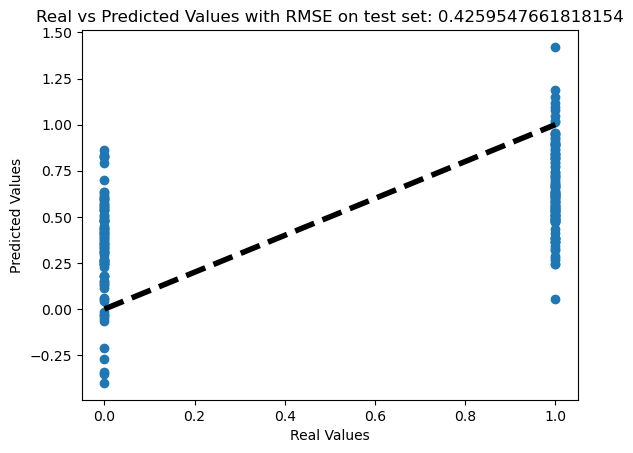

                                                index  p_value  Coefficient  \
0                                               const  0.00000      0.52495   
1                                cur_ff_angle_at_ref  0.02289     -0.17764   
2        cur_ff_distance_at_ref cur_ff_angle_at_ref  0.00352      0.15798   
3                  cur_ff_angle_diff_boundary_at_ref  0.00252     -0.11044   
4      flash_cluster_1_5_to_2_0_combd_median_ff_angle  0.01430     -0.08730   
5   cur_ff_angle_at_ref cur_ff_earliest_flash_re...  0.01680     -0.07862   
6   start_ang_cluster_20_LEFTMOST_latest_flash_rel...  0.00320      0.04722   
7         cur_ff_cluster_300_EARLIEST_FLASH_ff_angle  0.00821      0.04528   
8            cur_ff_cluster_300_LEFTMOST_ff_distance  0.01633      0.04329   
9   flash_cluster_1_0_to_1_5_LEFTMOST_earliest_fla...  0.01739     -0.03984   
10  cur_ff_cluster_200_LEFTMOST_earliest_flash_re...  0.02357      0.03832   
11  flash_cluster_1_5_to_2_0_combd_earliest_flash_...  0.0137

In [32]:
ml_inst = ml_methods_class.MlMethods()

for y_var_column in ['curv_of_traj_before_stop',
                    'd_heading_of_traj',
                    'cur_opt_arc_d_heading',
                    'diff_in_d_heading_to_cur_ff',
                    'dir_from_cur_ff_to_stop' # this one is classification though
                    ]:
    print('y_var_column:', y_var_column)
    osf.streamline_preparing_for_ml(y_var_column,
                                     ref_columns_only=False)
    ml_inst.use_train_test_split(osf.x_var_df, osf.y_var_df, y_var_column=y_var_column)
    ml_inst.use_linear_regression(show_plot=True)
    # show important features
    print(ml_inst.summary_df)

    

## vif

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
osf.x_var_df, osf.y_var_df

In [29]:
ml_inst.x_var_df = osf.x_var_df
ml_inst.y_var_df = osf.y_var_df

In [30]:
pd.set_option('display.max_rows', 100)
ml_inst.use_vif(ml_inst.x_var_df)

KeyboardInterrupt: 

In [ ]:
osf.vif_df.head(30)

## Classification

In [ ]:
y_var_column = 'dir_from_cur_ff_to_stop'

In [ ]:
osf.streamline_preparing_for_ml(y_var_column, 
                                ref_columns_only=False,
                                cluster_to_keep='all',
                                cluster_for_interaction='none',
                                add_ref_interaction=True,
                                winsorize_angle_features=True,
                                using_lasso=False, 
                                ensure_cur_ff_at_front=True,
                                use_pca=False,
                                use_combd_features_for_cluster_only=False,
                                )

Added interaction terms.
num_features_before_lasso: 420
num_features_after_lasso: 420


In [ ]:
ml_inst = ml_methods_class.MlMethods()
#ml_inst.use_train_test_split(osf.x_var_df, osf.y_var_df, y_var_column=y_var_column)
ml_inst.use_logistic_regression(osf.x_var_df, osf.y_var_df)

pd.options.display.max_rows = 101
ml_inst.summary_df[:10]

## CCA

In [ ]:
y_columns_of_interest = [
                        'd_heading_of_traj',
                        'diff_in_d_heading_to_cur_ff',
                        'curv_of_traj_before_stop',
                        'dir_from_cur_ff_to_stop' # this one is classification though
                        ]

In [ ]:

ref_columns = [column for column in osf.x_features_df if 'ref' in column]
ref_columns

In [ ]:
avg_canon_corrs

In [ ]:
ref_columns_only = False

for y_var in y_columns_of_interest:
    # Define data
    if ref_columns_only:
        X1 = osf.x_features_df[ref_columns].copy()
    else:
        X1 = osf.x_features_df.copy()
    #X2 = osf.only_cur_ff_df[[y_var]].copy()
    X2 = osf.only_cur_ff_df[y_columns_of_interest].copy()

    # Drop unnecessary columns
    for column in ['data_name', 'stop_point_index']:
        if column in X1.columns:
            X1.drop(columns=[column], inplace=True)

    print('Y var:', y_var)
    avg_x_loadings, avg_y_loadings, avg_canon_corrs = cca_utils.run_cca(X1, X2, n_comp=5, n_splits=5, show_plots=True)


    ml_inst.utils.plot_correlation_coefficients(avg_canon_corrs, len(avg_canon_corrs))
    cca_plotting.plot_x_loadings(avg_x_loadings, avg_canon_corrs, X1)
    cca_plotting.plot_y_loadings(avg_y_loadings, avg_canon_corrs, X2)
       
    break



In [ ]:
cca_plotting.plot_y_loadings(avg_y_loadings, avg_canon_corrs, X2)

In [ ]:
    cca_plotting.plot_correlation_coefficients(avg_canon_corrs)
    cca_plotting.plot_x_loadings(avg_x_loadings, avg_canon_corrs, X1)
    cca_plotting.plot_y_loadings(avg_y_loadings, avg_canon_corrs, X2)
       

In [ ]:
gc.collect()

## PCA

In [ ]:

for y_var_column in ['curv_of_traj_before_stop',
                    'd_heading_of_traj',
                    'cur_opt_arc_d_heading',
                    'diff_in_d_heading_to_cur_ff',
                    'dir_from_cur_ff_to_stop' # this one is classification though
                    ]:
    
    osf.streamline_preparing_for_ml(y_var_column,
                                     ref_columns_only=False, use_pca=True)
    ml_inst.use_train_test_split(osf.x_var_df, osf.y_var_df, y_var_column=y_var_column)
    ml_inst.use_linear_regression(show_plot=True)
    break
    

In [ ]:
osf.original_x_df.columns

In [ ]:
# Create a DataFrame of loadings
loadings = osf.pca.components_
feature_names = osf.original_x_df.columns
column_names = [f'x{i}' for i in range(loadings.shape[0])]
pca_loadings_df = pd.DataFrame(loadings.T, columns=column_names, index=feature_names)

sorted_summary_df = ml_inst.summary_df[ml_inst.summary_df['p_value'] <= 0.05].sort_values(by='Coefficient', ascending=False).copy()
for i in range(10):
    print('i:', i)
    sorted_result_row = sorted_summary_df.iloc[i]
    pca_x = sorted_result_row.name
    if pca_x == 'const':
        continue
    #column = pca_loadings_df.columns[i]
    print('pca_x:', pca_x)
    print('sorted_result_row:', sorted_result_row)
    print(pca_loadings_df[pca_x].sort_values(ascending=False).head(50))
    #print(df_loadings[column].sort_values(ascending=False).tail(5))
sorted_summary_df

In [ ]:
pca_loadings_df

## Corr

In [ ]:
corr_coeff = X2.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_coeff, cmap='coolwarm', annot=True, linewidths=1, vmin=-1)
plt.show()


# ML

### other ml models

In [ ]:
gc.collect()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

In [ ]:
y_var_column = 'curv_of_traj_before_stop'
#y_var_column = 'diff_in_d_heading_to_cur_ff'
ref_point_mode = 'time after cur ff visible'
ref_point_value = 0.1

osf.streamline_preparing_for_ml(y_var_column,
                                ref_columns_only=False)

In [ ]:
ml_inst.use_ml_model_for_regression(osf.x_var_df, osf.y_var_df, y_var_column=y_var_column, model_names=['linreg', 'grad_boosting', 'rf'])
ml_inst.model_comparison_df

In [ ]:
stop!

## rf feature importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Example dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Assuming you have the feature names in a list called feature_names
feature_names = [f'Feature {i}' for i in range(X.shape[1])]

# Combine feature names and their importances
features_and_importances = zip(feature_names, feature_importances)

# Sort the features by importance
sorted_features_and_importances = sorted(features_and_importances, key=lambda x: x[1], reverse=True)

# Display the sorted significant features and their importances
for feature, importance in sorted_features_and_importances:
    print(f"{feature}: {importance}")

## neural network

In [ ]:
reload(regression_utils)

In [ ]:
gc.collect()

In [ ]:
ml_inst.use_neural_network()

In [ ]:
STOP!

# Correlations

### within clusters

In [ ]:
cluster_name = 'cur_ff_cluster_100'
 #'start_ang_cluster_20'

In [ ]:
for category in ['ff_distance', 'ff_angle', '_ff_angle', 'ff_angle_boundary', 'flash_duration', 'earliest_flash_rel_time', 'latest_flash_rel_time']:
        specific_columns = [column for column in osf.x_features_df.columns if (cluster_name in column) & (category in column)]
        if category == '_ff_angle':
            specific_columns = [column for column in specific_columns if ('ff_angle_boundary' not in column)]
        if len(specific_columns) > 1:
            print(specific_columns)
            ml_inst.show_correlation_heatmap(specific_columns=specific_columns)
        else:
            print('oops')

In [ ]:
for category in ['ff_distance', 'ff_angle', '_ff_angle', 'ff_angle_boundary', 'flash_duration', 'earliest_flash_rel_time', 'latest_flash_rel_time']:
    for radius in [50, 100, 150, 200, 250, 300]:
        specific_columns = [column for column in osf.x_features_df.columns if (f'cur_ff_cluster_{radius}' in column) & (category in column)]
        if category == '_ff_angle':
            specific_columns = [column for column in specific_columns if ('ff_angle_boundary' not in column)]
        if len(specific_columns) > 1:
            print(specific_columns)
            ml_inst.show_correlation_heatmap(specific_columns=specific_columns)
        else:
            print('oops')

In [ ]:
i need (for 50):
median (or mean) ff distance
median (or mean) ff angle boundary
EARLIEST_FLASH rel time, ff angle (or boundary)
LATEST_FLASH rel time, ff angle
LONGEST_FLASH, ff angle

In [ ]:
ml_inst.use_vif(ml_inst.x_var_df)

### across 2 clusters

In [ ]:
raw_data_folder_path = 'all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328'
osf2 = only_cur_ff_class.OnlyStopFF(raw_data_folder_path=raw_data_folder_path)

In [ ]:
gc.collect()

In [ ]:
osf2.make_only_cur_ff_df()
osf2.make_x_features_df(exists_ok=False)
all_cluster_names = osf2.all_cluster_names
feature = 'ff_angle'

In [ ]:
# cluster_1 = 'cur_ff_cluster_75'
# cluster_2 = 'cur_ff_cluster_100'


In [ ]:
gc.collect()

In [ ]:
minimal_features_to_keep = features_to_keep_utils.get_minimal_features_to_keep(osf.x_features_df)
osf.x_features_df = osf.x_features_df[minimal_features_to_keep].copy()

In [ ]:
cluster_name = 'cur_ff_cluster_100'

In [ ]:
combn_columns_in_cluster = [column for column in osf.x_features_df.columns if (cluster_name in column) & ('combd' in column)]

In [ ]:
combn_columns_in_cluster

In [ ]:
rel_columns_1 = [column for column in osf.x_features_df.columns if (feature in column) & (cluster_1 in column)]

In [ ]:
all_cluster_names

In [ ]:
for i in range(len(all_cluster_names)):
    #j = i+1
    for j in range(i + 1, len(all_cluster_names)):
        cluster_1 = all_cluster_names[i]
        cluster_2 = all_cluster_names[j]
        rel_columns_1 = [column for column in osf.x_features_df.columns if (feature in column) & (cluster_1 in column)]
        rel_columns_2 = [column for column in osf.x_features_df.columns if (feature in column) & (cluster_2 in column)]
        if (len(rel_columns_1) > 0) & (len(rel_columns_2) > 0):
            rel_columns_1.sort()
            rel_columns_2.sort()
            rel_columns = rel_columns_1 + rel_columns_2
            #ml_inst.show_correlation_heatmap(specific_columns=rel_columns)

            #corr_coeff = osf.x_features_df[rel_columns_1].corrwith(osf.x_features_df[rel_columns_2])
            corr_coeff = osf.x_features_df[rel_columns].corr()
            #corr_coeff = corr_coeff.iloc[:len(rel_columns_1), len(rel_columns_1):]

            plt.figure(figsize=(15, 15))
            sns.heatmap(corr_coeff, cmap='coolwarm', annot=True, linewidths=1, vmin=-1)
            plt.show()



In [ ]:
gc.collect()

In [ ]:
osf.all_cluster_names

### across clusters

In [ ]:
cluster_ff_info = osf.ff_info_at_start_df.iloc[[100]]
types_of_ff_to_include=['leftmost', 'rightmost', 'earliest_flash', 'latest_flash', 'longest_flash']
columns_to_include=['ff_distance', 'ff_angle', 'angle_diff_boundary', 'earliest_flash_rel_time', 'latest_flash_rel_time', 'flash_duration']
agg_columns_to_include=['combd_min_ff_angle', 'combd_max_ff_angle', 'combd_median_ff_angle', 
                        'combd_min_angle_diff_boundary', 'combd_max_angle_diff_boundary', 'combd_median_angle_diff_boundary', 
                        'combd_min_ff_distance', 'combd_max_ff_distance', 'combd_median_ff_distance', 
                        'combd_total_flash_duration', 'combd_longest_flash_duration', 
                        'combd_earliest_flash_rel_time', 'combd_latest_flash_rel_time',
                        'num_ff_in_cluster'
                        ]                    

cluster_factors_df = only_cur_ff_utils._get_cluster_factors_df(cluster_ff_info, '', columns_to_include=columns_to_include,
                                    types_of_ff_to_include=types_of_ff_to_include)
cluster_factors_df_melted = cluster_factors_df.melt(id_vars=['group', 'ff'], var_name='feature', value_name='value')
# add the column factor_name, which a concatenation of ff_name and factor
cluster_factors_df_melted['ff_and_feature'] = cluster_factors_df_melted['ff'] + '_' + cluster_factors_df_melted['feature']                 

factors = cluster_factors_df_melted['ff_and_feature'].values.tolist()
factors.extend(agg_columns_to_include)

In [ ]:
for feature in factors:
    specific_columns = [column for column in osf.x_features_df.columns if (feature in column)]
    if len(specific_columns) > 1:
        print('Feature:', feature)
        print(specific_columns)
        ml_inst.show_correlation_heatmap(specific_columns=specific_columns)
    else:
        print('oops')

# Features

### Histplot of x features

In [ ]:
osf.x_features_df.columns[20:40]

In [ ]:
import random

In [ ]:
ff_angle_columns = [column for column in osf.x_features_df.columns if ('ff_angle' in column) & 
                    ('rank' not in column)]

In [ ]:
sampled_features = random.sample(list(ff_angle_columns), 20)

In [ ]:
ref_point_mode = 'time after cur ff visible'
ref_point_value = 0.1

# ref_point_mode = 'distance'
# ref_point_value = -190
osfxs =only_cur_ff_x_sess_class.OnlyStopFFAcrossSessions(monkey_name='monkey_Bruno')
osfxs.make_only_cur_ff_df_and_x_features_df_across_sessions(exists_ok=True, x_features_df_exists_ok=False, only_cur_ff_df_exists_ok=True,
                                                           ref_point_mode=ref_point_mode, ref_point_value=ref_point_value)

osfxs.prepare_only_cur_ff_data_for_ml()
# osf.only_cur_ff_df = osf.combd_only_cur_ff_df.copy()
# osf.x_features_df = osf.combd_x_features_df.copy()
# osf.x_features_df_w_all_columns = osf.combd_x_features_df.copy()

In [ ]:
for feature in sampled_features:
    sns.histplot(osfxs.x_features_df[feature])
    plt.title(feature)
    plt.show()

### Histplot of y_var

In [ ]:
for y_var_column in y_columns_of_interest:
    sns.histplot(osf.only_cur_ff_df[y_var_column])
    plt.show()

### Get features to keep

In [ ]:
minimal_features_to_keep = features_to_keep_utils.get_minimal_features_to_keep(osf.x_features_df)
osf.x_features_df = osf.x_features_df_w_all_columns[minimal_features_to_keep].copy()

In [ ]:
reasonable_features_to_keep = features_to_keep_utils.get_reasonable_features_to_keep(osf.x_features_df)
osf.x_features_df = osf.x_features_df_w_all_columns[reasonable_features_to_keep].copy()

In [ ]:
features_to_keep = features_to_keep_utils.get_features_to_keep_based_on_specific_selections()
features_to_keep_all = []
for radius in features_to_keep.keys():
    features_to_keep_all += features_to_keep[radius]
osf.x_features_df = osf.x_features_df_w_all_columns[features_to_keep_all].copy()

In [ ]:
# or, using the original:
osf.x_features_df = osf.x_features_df_w_all_columns.copy()

### Feature selections: Lasso

In [ ]:
osf.make_x_and_y_var_df(use_pca=True)

y_var = osf.y_var_df[y_var_column].copy()
x_var_df = osf.x_var_df.copy()
x_var_df, y_var = show_planning_utils.remove_outliers(x_var_df, y_var)

In [ ]:

# LASSO for variable selection
lasso = LassoCV(cv=5).fit(x_var_df, y_var)

# Selected variables (non-zero coefficients)
selected_features = x_var_df.columns[(lasso.coef_ != 0)]

In [ ]:
x_var_df.shape

In [ ]:
len(selected_features)

In [ ]:
selected_features[:50]

In [ ]:
unselected_features = ml_inst.x_var_df.columns[(lasso.coef_ == 0)]
unselected_features[50:]

In [ ]:
ml_inst.use_train_test_split(osf.x_var_df, osf.y_var_df, y_var_column=y_var_column)
ml_inst.use_linear_regression(show_plot=True)

# Appendix

### limit ref_time_rel_to_stop

In [ ]:
osf.only_cur_ff_df['ref_time_rel_to_stop'] = osf.only_cur_ff_df['ref_time'] - osf.only_cur_ff_df['stop_time']
osf.only_cur_ff_df = osf.only_cur_ff_df[osf.only_cur_ff_df['ref_time_rel_to_stop'].between(-0.5, -0.1)].copy()
osf.x_features_df = osf.x_features_df.loc[osf.only_cur_ff_df.index]

In [ ]:
osf.only_cur_ff_df['ref_time_rel_to_stop'] = osf.only_cur_ff_df['ref_time'] - osf.only_cur_ff_df['stop_time']
osf.only_cur_ff_df = osf.only_cur_ff_df[osf.only_cur_ff_df['ref_time_rel_to_stop'] < -0.5].copy()
osf.x_features_df = osf.x_features_df.loc[osf.only_cur_ff_df.index]

In [ ]:
sns.histplot(osf.only_cur_ff_df['stop_time'] - osf.only_cur_ff_df['ref_time'])
plt.show()

## modify ref_point 

In [ ]:
osf.only_cur_ff_df['ref_time_rel_to_stop'] = osf.only_cur_ff_df['ref_time'] - osf.only_cur_ff_df['stop_time']

In [ ]:
osf.only_cur_ff_df.columns

In [ ]:
# osf.only_cur_ff_df['ref_cum_distance_rel_to_stop'] = osf.only_cur_ff_df['ref_cum_distance'] - osf.only_cur_ff_df['stop_cum_distance']

In [ ]:
osf.only_cur_ff_df['ref_time_rel_to_stop'] = osf.only_cur_ff_df['ref_time'] - osf.only_cur_ff_df['stop_time']
osf.only_cur_ff_df[osf.only_cur_ff_df['ref_time_rel_to_stop'] > -0.5]

## find the closest stop time to each ff caught T

In [ ]:
stop_sub = dc.monkey_information.loc[dc.monkey_information['monkey_speeddummy']==0, ['time', 'point_index']].copy()

In [ ]:
closest_stop_to_capture_df = pd.DataFrame()
all_closest_point_before_capture_rows = pd.DataFrame()
for i in range(len(dc.ff_caught_T_new)):
    caught_time = dc.ff_caught_T_new[i]
    time = stop_sub['time'].values
    iloc_of_closest_time = np.argmin(np.abs(time - caught_time))
    closest_point_row = stop_sub.iloc[[iloc_of_closest_time]].copy()
    closest_point_row['cur_ff_index'] = i
    closest_point_row['caught_time'] = caught_time
    closest_stop_to_capture_df = pd.concat([closest_stop_to_capture_df, closest_point_row], axis=0)

    monkey_t_sub = time[time <= caught_time]
    iloc_of_closest_time = np.argmin(np.abs(monkey_t_sub - caught_time))
    closest_point_row = stop_sub.iloc[[iloc_of_closest_time]].copy()
    closest_point_row['cur_ff_index'] = i
    closest_point_row['caught_time'] = caught_time
    all_closest_point_before_capture_rows = pd.concat([all_closest_point_before_capture_rows, closest_point_row], axis=0)

closest_stop_to_capture_df['time_before_capture'] = all_closest_point_before_capture_rows['time'].values
closest_stop_to_capture_df['diff_from_caught_time'] = closest_stop_to_capture_df['time'] - closest_stop_to_capture_df['caught_time']
closest_stop_to_capture_df['diff_from_before_capture_to_caught_time'] = closest_stop_to_capture_df['time_before_capture'] - closest_stop_to_capture_df['caught_time']

In [ ]:

# make x and y axis equal scale
fig, ax = plt.subplots(figsize=(10, 10))

# Creating an ellipse using sine and cos functions:
ax.scatter(x=closest_stop_to_capture_df['diff_from_caught_time'], y=closest_stop_to_capture_df['diff_from_before_capture_to_caught_time'], s=1)
ax.plot([-1, 0], [-1, 0], color='black')
ax.plot([0, 1], [0, -1], color='black')
#ax.set_aspect('equal')

plt.show()

In [ ]:
closest_stop_to_capture_df[closest_stop_to_capture_df['diff_from_caught_time'] < -0.00001]

In [ ]:
closest_stop_to_capture_df_sub = closest_stop_to_capture_df[closest_stop_to_capture_df['diff_from_caught_time'] > 0].copy()
closest_stop_to_capture_df_sub[closest_stop_to_capture_df_sub['diff_from_caught_time'] >= np.abs(closest_stop_to_capture_df_sub['diff_from_before_capture_to_caught_time'])]

In [ ]:
closest_stop_to_capture_df

In [ ]:
sns.histplot(closest_stop_to_capture_df['diff_from_caught_time'])
plt.show()

In [ ]:
sns.histplot(closest_stop_to_capture_df['diff_from_before_capture_to_caught_time'])
plt.show()

Now, the above is enough justification to choose closest point rather than closest point before capture

# Check vif in a cluster

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
cluster_col = [column for column in mtc.x_var_df.columns if ('cur_ff_cluster_100_' in column)]
#cluster_col = [column for column in mtc.x_var_df.columns if ('ref' in column)]

In [ ]:
cluster_col

In [ ]:
x_var_df = mtc.x_var_df[cluster_col].copy()

In [ ]:
specific_columns = [column for column in cluster_col if ('combd' in column)]
x_var_df = prep_ml_data_utils.add_interaction_terms_to_df(x_var_df, specific_columns=specific_columns)


Added interaction terms.


In [ ]:
vif_df = drop_high_vif_vars.get_vif_df(data_item.y_var)
vif